In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Read Data

In [2]:
df = pd.read_csv("C:/Users/zumars064124/Documents/ADSB 2/craigslist-carstrucks-data/craigslistVehiclesFull.csv")
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


## Quick Look

In [3]:
#dimension
df.shape

(1723065, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


# Preprocessing Data

## Identify Missing Values

In [6]:
mv = df.isnull().sum()
mv = pd.DataFrame(mv)
mv['Percentage'] = mv[0] / 1723065 *100
mv

#kolom '0' adalah kolom yang berisi banyaknya missing value pada variabel terkait
#kolom 'Percentage' adalah kolom yang berisi persentase missing value pada variabel terkait

,0,Percentage
url,0,0.000000
city,0,0.000000
price,0,0.000000
year,6315,0.366498
manufacturer,136414,7.916939
make,69699,4.045059
condition,700790,40.671130
cylinders,691291,40.119845
fuel,10367,0.601660
odometer,564054,32.735503


## Drop data yang tidak diperlukan

In [7]:
#Variabel 'vin' dan 'size' didrop karena terdapat missing value >60%
df.drop(['vin','size'],axis = 1,inplace = True)

In [8]:
#Variabel 'url' dan 'image_url' didrop karena tidak diperlukan dalam proses analisis
df.drop(['url','image_url'],axis = 1,inplace = True)

In [9]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [10]:
df.columns

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'lat', 'long', 'county_fips',
       'county_name', 'state_fips', 'state_code', 'state_name', 'weather'],
      dtype='object')

In [11]:
df.loc[:, ['title_status', 'transmission', 'drive', 'type']].head(10)

,title_status,transmission,drive,type
0,clean,automatic,rwd,coupe
1,clean,other,NaN,NaN
2,clean,automatic,NaN,NaN
3,clean,automatic,fwd,sedan
4,clean,automatic,NaN,NaN
5,clean,automatic,4wd,NaN
6,rebuilt,automatic,4wd,SUV
7,clean,NaN,NaN,NaN
8,clean,other,NaN,NaN
9,clean,automatic,4wd,SUV


In [12]:
df[df['state_name'] == 'FAILED']

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
8,soo,2700,2018.0,NaN,Ebike,excellent,NaN,electric,NaN,clean,...,NaN,red,46.509803,-84.257825,NaN,NaN,NaN,NaN,FAILED,NaN
9,soo,12995,2003.0,ford,excursion,excellent,10 cylinders,gas,236000.0,clean,...,SUV,blue,46.514191,-84.291307,NaN,NaN,NaN,NaN,FAILED,NaN
10,soo,4000,2006.0,chev,express 2500 van,good,6 cylinders,gas,138000.0,clean,...,van,white,46.497529,-84.467464,NaN,NaN,NaN,NaN,FAILED,NaN
11,soo,13000,2002.0,chevrolet,2500 hd,excellent,8 cylinders,diesel,350000.0,clean,...,truck,white,46.497529,-84.467464,NaN,NaN,NaN,NaN,FAILED,NaN
12,soo,21695,2016.0,hyundai,sonata,like new,4 cylinders,gas,44814.0,clean,...,sedan,white,46.517791,-84.342291,NaN,NaN,NaN,NaN,FAILED,NaN
13,soo,18000,2011.0,chevrolet,camaro,like new,6 cylinders,gas,NaN,clean,...,coupe,green,46.796740,-84.278784,NaN,NaN,NaN,NaN,FAILED,NaN
14,soo,29000,2016.0,hyundai,santa fe xl,excellent,6 cylinders,gas,31500.0,clean,...,SUV,black,46.512332,-84.252914,NaN,NaN,NaN,NaN,FAILED,NaN
15,soo,4500,2010.0,chev,cobolt,excellent,4 cylinders,gas,103456.0,clean,...,sedan,black,46.530700,-84.304600,NaN,NaN,NaN,NaN,FAILED,NaN
16,whistler,9865,2006.0,honda,cr-v exl,like new,4 cylinders,gas,193599.0,clean,...,SUV,blue,49.234133,-122.861002,NaN,NaN,NaN,NaN,FAILED,NaN
17,whistler,41896,2017.0,ram,1500 laramie,like new,8 cylinders,gas,38578.0,clean,...,pickup,black,49.234133,-122.861002,NaN,NaN,NaN,NaN,FAILED,NaN


Ditemukan data yang tidak jelas karena berisikan 'FAILED' pada variabel 'state_name' dan memiliki missing value pada variabel 'county_fips' dan 'state_fips', sehingga data ini tidak digunakan. Untuk itu, kita mengambil data yang tidak mengandung hal-hal tersebut.

In [13]:
df = df[df['state_name'] != 'FAILED']

## Imputasi missing value

### Data Kategorikal

Imputasi missing value pada data kategorikal menggunakan modus.

In [14]:
mmodus = ['manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type',
          'paint_color', 'county_name', 'state_code']
for feature in mmodus:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [15]:
df.isnull().sum()

city                 0
price                0
year              6311
manufacturer         0
make                 0
condition            0
cylinders            0
fuel                 0
odometer        550509
title_status         0
transmission         0
drive                0
type                 0
paint_color          0
lat                  0
long                 0
county_fips          0
county_name          0
state_fips           0
state_code           0
state_name           0
weather            595
dtype: int64

### Data Numerik

Imputasi pada data numerik dapat menggunakan median atau mean (jika tidak terdapat outlier).
Identifikasi outlier dapat dilakukan menggunakan boxplot.

#### Check Outlier Using Boxplot

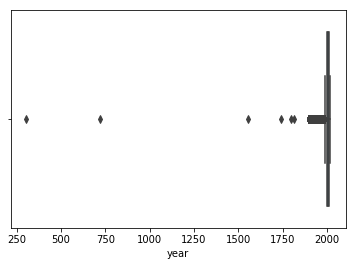

In [16]:
sns.boxplot(x = df['year'])

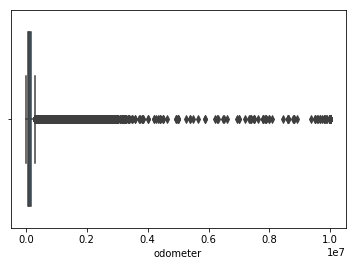

In [17]:
sns.boxplot(x = df['odometer'])

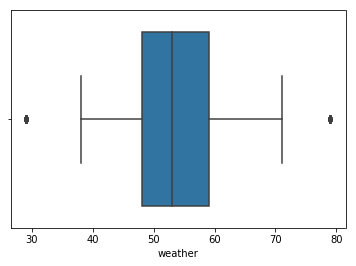

In [18]:
sns.boxplot(x = df['weather'])

Karena terdapat outlier, maka imputasi missing value pada data numerik menggunakan median.

In [19]:
mmedian = ['year', 'odometer', 'weather']
for feature in mmedian:
    if feature in df.columns.values:
        df[feature] = df[feature].fillna(df[feature].median())

In [20]:
df.isnull().sum()

city            0
price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
lat             0
long            0
county_fips     0
county_name     0
state_fips      0
state_code      0
state_name      0
weather         0
dtype: int64

# Exploratory Data Analysis

## Data Analysis

In [27]:
df.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.664232e+06,1.664232e+06,1.664232e+06,1.664232e+06,1.664232e+06,1.664232e+06,1.664232e+06,1.664232e+06
mean,1.106324e+05,2.004652e+03,1.119666e+05,3.847107e+01,-9.287752e+01,2.843053e+04,2.834410e+01,5.378678e+01
std,1.022036e+07,1.213793e+01,1.126864e+05,5.551493e+00,1.630167e+01,1.605423e+04,1.603224e+01,7.798000e+00
min,1.000000e+00,3.020000e+02,0.000000e+00,1.932065e+01,-1.661151e+02,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.200000e+03,2.002000e+03,8.587100e+04,3.475190e+01,-1.038524e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,6.995000e+03,2.007000e+03,1.076000e+05,3.912357e+01,-8.790470e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.490000e+04,2.012000e+03,1.299582e+05,4.227856e+01,-8.085649e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,2.019000e+03,1.000000e+07,7.020945e+01,-6.700740e+01,5.604500e+04,5.600000e+01,7.900000e+01


In [28]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,ford,fleetwood,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,ford,2001 Grand Prix,excellent,6 cylinders,gas,217000.0,clean,...,sedan,white,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [57]:
kategori = df[['city', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type',
          'paint_color', 'county_name', 'state_code', 'state_name']]
kategori.head()

,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
0,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,coupe,red,Lincoln,SD,South Dakota
1,marshall,ford,fleetwood,excellent,6 cylinders,gas,clean,other,4wd,sedan,white,Deuel,SD,South Dakota
2,marshall,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Meade,SD,South Dakota
3,marshall,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,sedan,grey,Osceola,IA,Iowa
4,marshall,ford,2001 Grand Prix,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Kossuth,IA,Iowa


In [58]:
kategori.describe()

,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
count,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232,1664232
unique,446,53,104871,6,8,5,6,3,3,13,12,1834,51,51
top,cosprings,ford,1500,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Jefferson,CA,California
freq,8278,419575,90582,1104838,1015524,1488125,1547499,1431380,1069710,942062,891811,18920,154299,154299


Histogram

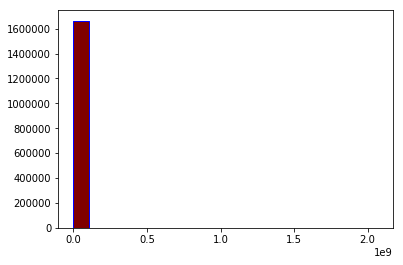

In [33]:
plt.hist(df['price'], 
         facecolor='maroon', 
         edgecolor='blue', 
         bins=20)
plt.show()

#### Pie Chart

In [34]:
dfy = df[df['year'] >= 2010]
dfy.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.477500,-96.704100,46083.0,Lincoln,46.0,SD,South Dakota,38.0
6,marshall,12500,2015.0,jeep,patriot high altitude,like new,4 cylinders,gas,39500.0,rebuilt,...,SUV,grey,43.548600,-96.633200,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
98,easttexas,38500,2016.0,ram,2500,excellent,6 cylinders,gas,107600.0,lien,...,sedan,white,32.607600,-93.752600,22015.0,Bossier,22.0,LA,Louisiana,67.0
100,easttexas,7875,2012.0,kia,sorento,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,32.109500,-95.334200,48073.0,Cherokee,48.0,TX,Texas,67.0
103,lasvegas,8950,2013.0,ford,f-150 stx,excellent,6 cylinders,gas,142428.0,salvage,...,truck,white,40.746203,-111.938152,49035.0,Salt Lake,49.0,UT,Utah,50.0


In [48]:
pie = dfy["condition"].value_counts().reset_index()

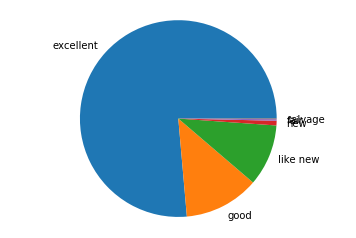

In [51]:
plt.pie(pie['condition'], 
        labels=pie['index'])

plt.axis('equal')

plt.show()

Berdasarkan visualisasi di atas, diketahui bahwa sejak tahun 2010, mobil bekas yang dijual mayoritas dalam kondisi "excellent".

##### Merek mobil bekas yang dijual dengan harga terendah dan tertinggi pada tahun 2018

In [80]:
bar = df[df['year'] == 2018]
price_highest=bar.sort_values('price',ascending=False).head(20)
price_lowest=bar.sort_values('price',ascending=True).head(20)

Penjualan mobil dengan 20 harga tertinggi yang diproduksi tahun 2018

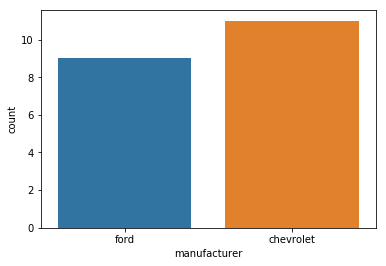

In [82]:
sns.countplot(x = price_highest.manufacturer)
plt.figure(figsize = (20,10))
plt.show()

Penjualan mobil dengan 20 harga terendah yang diproduksi tahun 2018

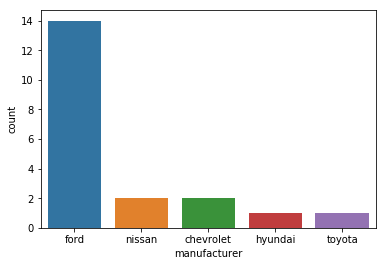

In [83]:
sns.countplot(x = price_lowest.manufacturer)
plt.figure(figsize = (20,10))
plt.show()

Berdasarkan visualisasi di atas, diketahui bahwa merek mobil bekas yang dijual dengan harga tertinggi pada tahun 2018 adalah chevrolet dan ford, sedangkan untuk harga terendahnya adalah ford, nissan, chevrolet, hyundai, dan toyota. Ternyata, mobil'ford' dapat dijual kembali dengan nilai harga yang tinggi maupun rendah.

#### Violinplot

In [85]:
vio = bar[bar['manufacturer'] == 'ford']
vio.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
225,rockford,19991,2018.0,ford,ASK FOR TOM DAUPHIN,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,43.066800,-88.146900,55133.0,Waukesha,55.0,WI,Wisconsin,45.0
828,appleton,38400,2018.0,ford,super duty f-250 srw,excellent,8 cylinders,gas,21825.0,clean,...,sedan,grey,44.227258,-88.467902,55139.0,Winnebago,55.0,WI,Wisconsin,45.0
869,glensfalls,225,2018.0,ford,haul master,excellent,6 cylinders,other,107600.0,clean,...,sedan,white,43.329000,-73.681800,36113.0,Warren,36.0,NY,New York,53.0
2143,buffalo,19200,2018.0,ford,Supercharged 700HP,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,42.916400,-78.876300,36029.0,Erie,36.0,NY,New York,53.0
2184,providence,39995,2018.0,ford,new handicap van,excellent,6 cylinders,gas,107600.0,clean,...,sedan,white,42.716354,-71.419770,33011.0,Hillsborough,33.0,NH,New Hampshire,43.0


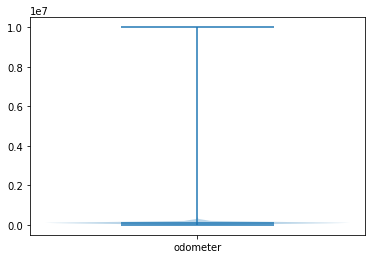

In [89]:
vio_array = np.array(df[['odometer']])
vp = plt.violinplot(vio_array,
                    showmedians=True)

plt.xticks([1], ['odometer'])

plt.show()    

Berdasarkan visualisasi di atas, ordometer penjualan mobil bekas merek ford memiliki variansi yang tinggi. Hal ini dapat menjadi penyebab penentuan harga jual mobil ford.

#### Korelasi

In [62]:
from sklearn.preprocessing import LabelEncoder
for feature in kategori:
    if feature in df.columns.values:
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,14,53581,2,5,2,43600.0,0,...,3,8,43.4775,-96.7041,46083.0,965,46.0,41,South Dakota,38.0
1,marshall,1515,1999.0,17,69836,0,5,2,107600.0,0,...,9,10,44.7612,-96.6907,46039.0,477,46.0,41,South Dakota,38.0
2,marshall,17550,2008.0,17,64943,0,5,2,107600.0,0,...,9,10,44.1415,-103.2052,46093.0,1061,46.0,41,South Dakota,38.0
3,marshall,2800,2004.0,17,97257,2,5,2,168591.0,0,...,9,5,43.2845,-95.5930,19143.0,1226,19.0,12,Iowa,47.0
4,marshall,400,2001.0,17,8665,0,5,2,217000.0,0,...,9,10,43.0261,-94.4064,19109.0,901,19.0,12,Iowa,47.0


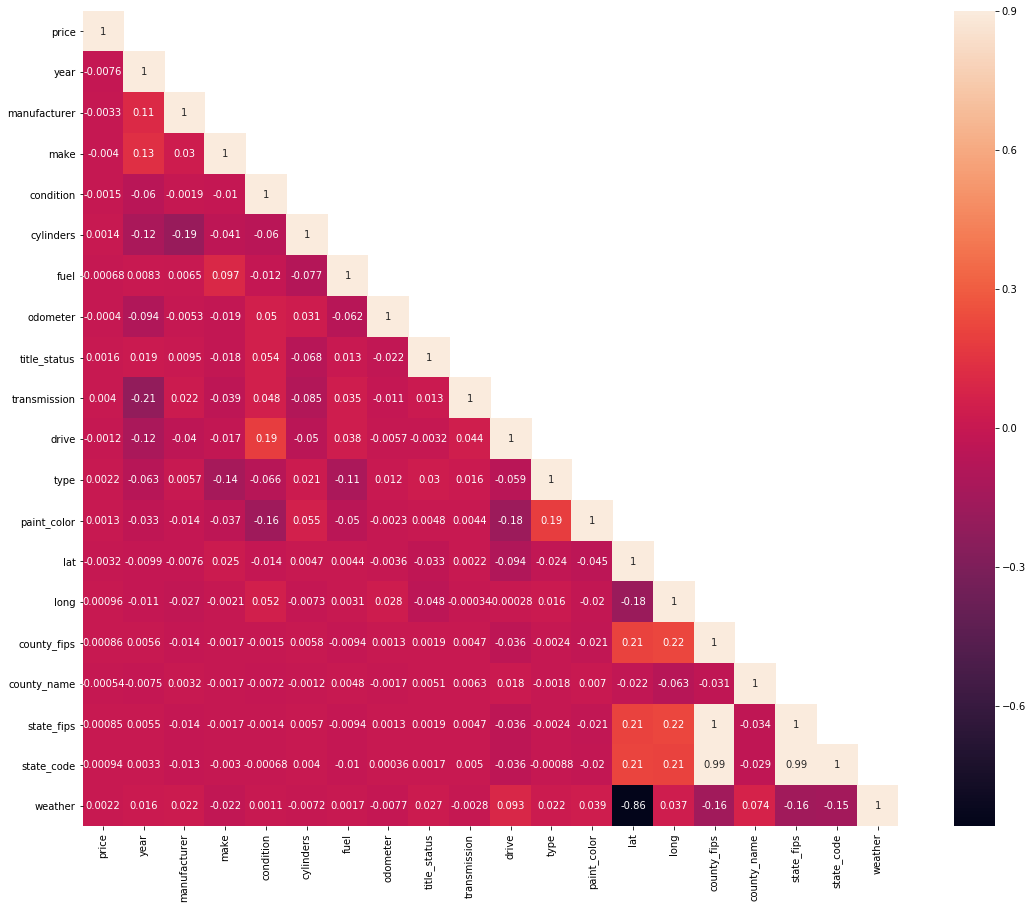

In [66]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,15))
fig.set_size_inches(20,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Berdasarkan visualisasi di atas, diketahui bahwa 'lat' dan 'weather' memiliki korelasi yang tinggi, yaitu sebesar -0.86 yang berarti bahwa lokasi memiliki hubungan berbanding terbalik dengan cuaca.